In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
train=pd.read_csv('trains.csv')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


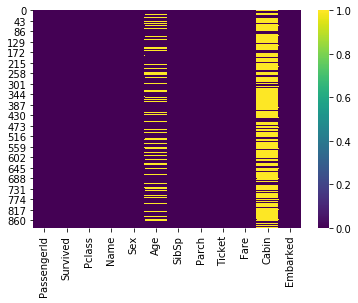

In [5]:
sns.heatmap(train.isnull(),cmap='viridis')

In [25]:
train.drop('Cabin',axis=1,inplace=True)

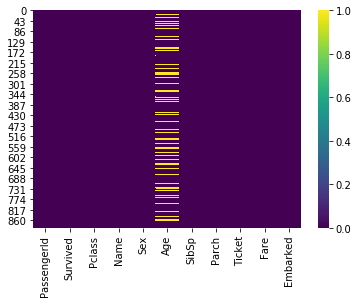

In [26]:
sns.heatmap(train.isnull(),cmap='viridis')

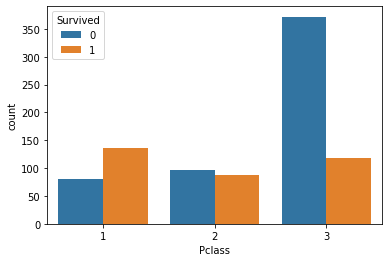

In [27]:
sns.countplot(x='Pclass',data=train,hue='Survived')

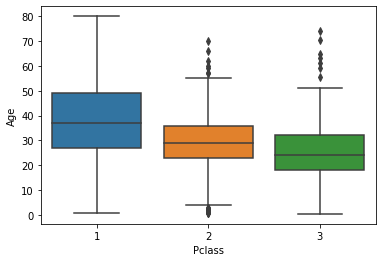

In [10]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [28]:
def a(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [29]:
train['Age']=train[['Age','Pclass']].apply(a,axis=1)

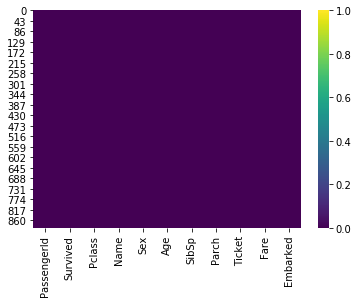

In [30]:
sns.heatmap(train.isnull(),cmap='viridis')

In [31]:
train.dropna(inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [34]:
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [35]:
train.drop(['Embarked','Sex','Name','Ticket'],inplace=True,axis=1)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [37]:
train=pd.concat([Embarked,sex,train],axis=1)

In [38]:
train.head()

,Q,S,male,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,1,1,0,3,22.0,1,0,7.2500
1,0,0,0,2,1,1,38.0,1,0,71.2833
2,0,1,0,3,1,3,26.0,0,0,7.9250
3,0,1,0,4,1,1,35.0,1,0,53.1000
4,0,1,1,5,0,3,35.0,0,0,8.0500


In [39]:
train.drop('Survived',axis=1)

,Q,S,male,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,1,1,3,22.0,1,0,7.2500
1,0,0,0,2,1,38.0,1,0,71.2833
2,0,1,0,3,3,26.0,0,0,7.9250
3,0,1,0,4,1,35.0,1,0,53.1000
4,0,1,1,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,1,1,887,2,27.0,0,0,13.0000
887,0,1,0,888,1,19.0,0,0,30.0000
888,0,1,0,889,3,24.0,1,2,23.4500
889,0,0,1,890,1,26.0,0,0,30.0000


In [40]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
 X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel=LogisticRegression()

In [45]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions=logmodel.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
accuracy=confusion_matrix(y_test,predictions)

In [50]:
accuracy

array([[149,  14],
       [ 39,  65]], dtype=int64)

In [51]:
from sklearn.metrics import  accuracy_score

In [52]:
accuracy=accuracy_score(y_test,predictions)

In [53]:
accuracy

0.8014981273408239

In [54]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [55]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267

